# Load Data From Paper
[Beyond Incompatibility: Trade-offs between Mutually
Exclusive Fairness Criteria in Machine Learning and Law](https://arxiv.org/pdf/2212.00469)

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

# Load paper data
synth_data_from_paper_filepath = Path("../prepared-data/synthetic/2groups/2022-01-12/dataset.csv")
raw_data = pd.read_csv(synth_data_from_paper_filepath)
raw_data.head()

,group,uuid,true_score,pred_score,groundTruthLabel,predictedLabel
0,0,223704946252196807091298734533014967204,3.741460,6.142062,1,1
1,0,224541773764000480556563320628354434199,5.053919,5.872418,1,1
2,0,153592159237664263961470057929324881735,3.416175,5.790487,1,1
3,0,248500439509309554877149774539242102947,4.031626,5.756255,1,1
4,0,288410677808488351912798103878192180675,3.832034,5.740493,1,1


# Get FAIM Scores

In [3]:
from faim.algorithm.faim import FairInterpolationMethod

fair_interpolation_method = FairInterpolationMethod(
    raw_data=raw_data,
    group_names={0: "advantaged", 1: "disadvantaged"},
    pred_score_column="pred_score",
    score_stepsize=0.1,
    thetas={0: np.array([1, 0, 0]), 1: np.array([1, 0, 0])},
)
data_with_faim_scores = fair_interpolation_method.run()

# Plot Scores Before and After FAIM

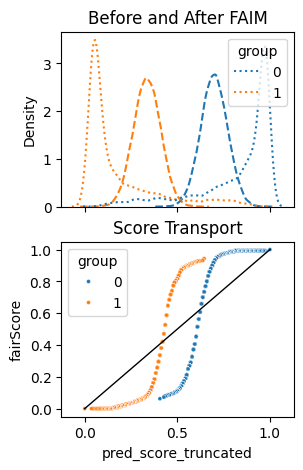

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.color_palette("tab10")
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(3, 5))

sns.kdeplot(data=data_with_faim_scores, x="pred_score_truncated", hue="group", linestyle="--", ax=ax1)
sns.kdeplot(data=data_with_faim_scores, x="fairScore", hue="group", linestyle=":", ax=ax1)

sns.scatterplot(data=data_with_faim_scores, x="pred_score_truncated", y="fairScore", hue="group", s=8, ax=ax2)
plt.plot([0, 1], [0, 1], 'k-', linewidth=1)

_ = ax1.set_title("Before and After FAIM")
_ = ax2.set_title("Score Transport")